In [1]:
import pandas as pd
import numpy as np

#data preprocessing
from scipy.stats import kurtosis
from scipy.stats import skew
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

#coefficient generator
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif

#cluster model
from sklearn_extra.cluster import KMedoids

#xgboost and LR
import xgboost as xgb
from sklearn.metrics import roc_curve, auc

#dimension reduction
from sklearn.decomposition import PCA

#graph
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
gmc = pd.read_csv("C:\\Users\\king0\\OneDrive\\鄧惠文專題\\data\\GMC\\GMC_deal.csv").drop(columns='Unnamed: 0')

In [4]:
X_ = gmc.drop(columns='y')
y = gmc['y']

   column  categories number       min        max
0      x1             125728 -3.123339   3.885743
1      x2                 86 -3.540201   3.838715
2      x3                 16 -0.435833   2.991251
3      x4             114194 -2.359501   3.347045
4      x5              13595 -7.562403   3.280870
5      x6                  2  0.000000   1.000000
6      x7                 58 -1.642610   9.628425
7      x8                 19 -0.242223   5.192348
8      x9                 28 -1.290370   1.299648
9     x10                 13 -0.230727   5.493386
10    x11                 14 -0.679073  17.256824
11    x12                  2  0.000000   1.000000


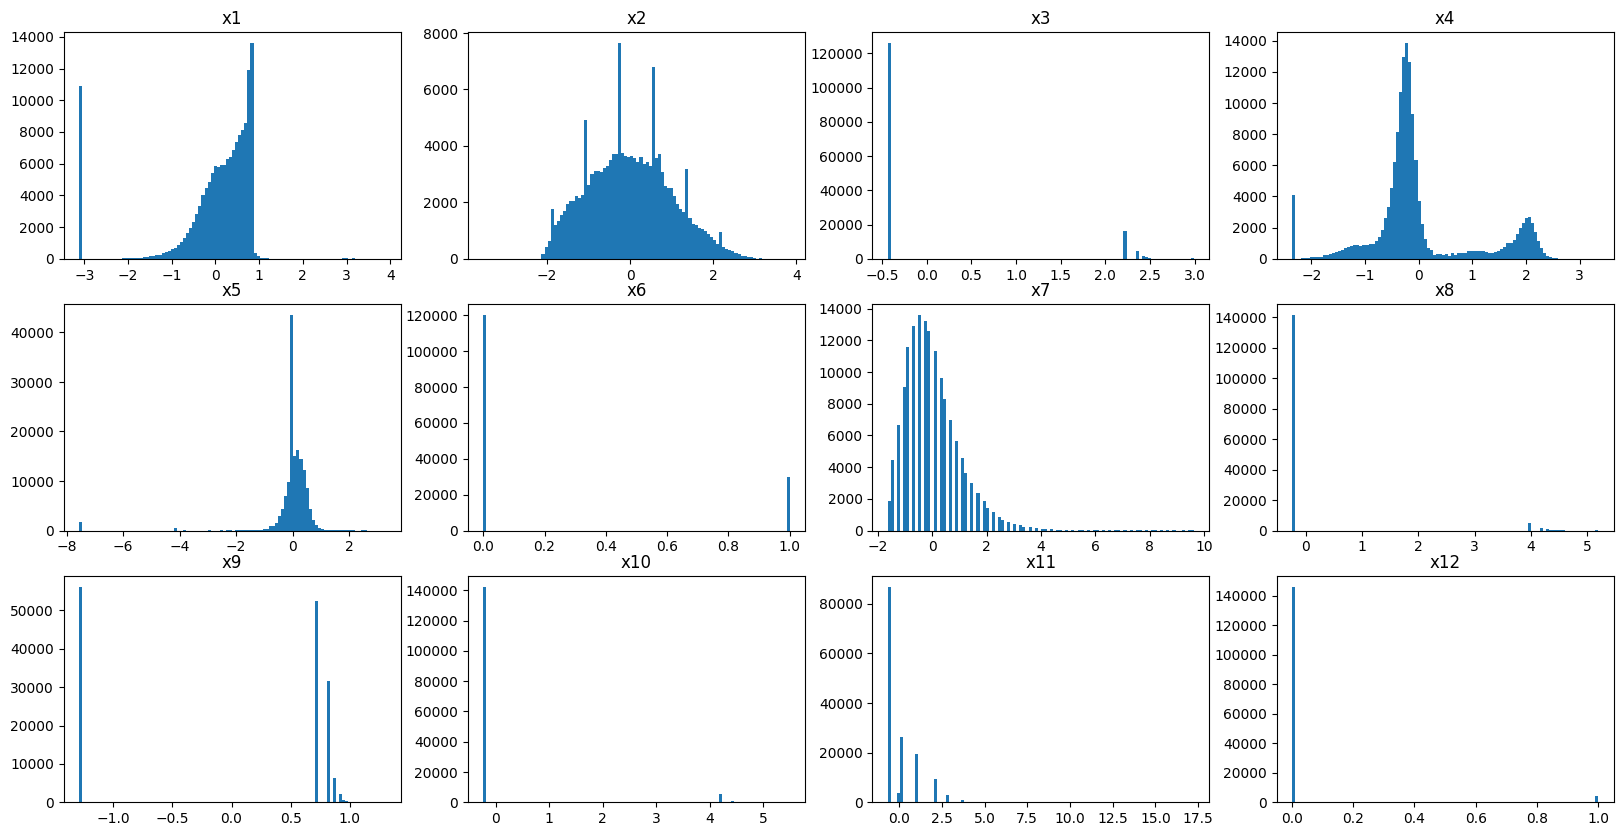

In [6]:
#check data unique value
table = list()
for i in X_.columns :
    a = dict()
    a['column'] = i
    a['categories number'] = len(X_[i].value_counts())
    a['min'] = min(X_[i])
    a['max'] = max(X_[i])
    table.append(a)
table = pd.DataFrame(table)
print(table)

# figure, axis = plt.subplots(3, 4, figsize=(20,10))
# name = 0
# for i in range(3) :
#     for j in range(4) :
#         axis[i, j].hist(X_[X_.columns[name]], bins=100)
#         name += 1
#         axis[i, j].set_title("x"+str(name))
# plt.show()

In [7]:
def bin_range(lower, upper, bins):
    bin_size = (upper - lower) / bins
    result = []
    for i in range(bins+1):
        result.append(lower + i * bin_size)
    result.append(upper+1)
    return result

In [8]:
X = X_.copy()
cat = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
for col, cate in zip(X_.columns, cat) :
    ra = bin_range(min(X_[col]), max(X_[col]), cate)
    X[col] = pd.Series(pd.cut(X_[col], ra, labels=ra[:-1], right=False).astype(float))

In [9]:
table = list()
for i in X.columns :
    a = dict()
    a['column'] = i
    a['categories number'] = len(X[i].value_counts())
    a['min'] = min(X[i])
    a['max'] = max(X[i])
    table.append(a)
table = pd.DataFrame(table)
print(table)

# figure, axis = plt.subplots(3, 4, figsize=(20,10))
# name = 0
# for i in range(3) :
#     for j in range(4) :
#         axis[i, j].hist(X[X.columns[name]], bins=100)
#         name += 1
#         axis[i, j].set_title("x"+str(name))
# plt.show()

   column  categories number       min        max
0      x1                 89 -3.123339   3.885743
1      x2                 79 -3.540201   3.838715
2      x3                 13 -0.435833   2.991251
3      x4                 99 -2.359501   3.347045
4      x5                 63 -7.562403   3.280870
5      x6                  2  0.000000   1.000000
6      x7                 58 -1.642610   9.628425
7      x8                 14 -0.242223   5.192348
8      x9                 18 -1.290370   1.299648
9     x10                 12 -0.230727   5.493386
10    x11                 14 -0.679073  17.256824
11    x12                  2  0.000000   1.000000


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
#I socre function
def I1(X, y) :
    n = len(X)
    y_mean = sum(y)/len(y)
    I_list = []
    for i in X.columns :
        I = 0
        values, amounts = X[i].value_counts().index, X[i].value_counts().values
        for value, n_j in zip(values, amounts) :
            if (n_j) == 0 : continue
            yj_mean = sum(y[X[i]==value])/len(y[X[i]==value])
            I += (n_j**2)*((yj_mean-y_mean)**2)
        I_list.append(I/n)
    return I_list
            

In [12]:
coef = I1(X_train, y_train)

In [13]:
coef

[40.35145750788755,
 1.5822875212860879,
 77.12645385023254,
 1.345174920406002,
 1.8225161739689861,
 0.8761903995958372,
 1.945859264554606,
 59.101354035836955,
 8.260389997838166,
 38.68500793833924,
 3.0393300560195367,
 0.06331006817111637]

In [14]:
poly_model = PolynomialFeatures(1, include_bias=False)
pd.DataFrame(poly_model.fit_transform(X_train))*coef

,0,1,2,3,4,5,6,7,8,9,10,11
0,-15.728878,-1.048145,-33.614249,2.890338,-0.146794,0.87619,0.532127,-14.315703,5.814851,-8.925692,-2.063927,0.0
1,23.866852,1.520480,-33.614249,-0.487235,0.248447,0.00000,0.093490,-14.315703,-10.658958,-8.925692,-2.063927,0.0
2,26.695119,-1.164901,-33.614249,-0.717525,0.446068,0.00000,-2.099695,-14.315703,-10.658958,-8.925692,0.116597,0.0
3,15.382053,-0.347611,-33.614249,2.583286,-0.146794,0.87619,-0.564465,-14.315703,5.814851,-8.925692,0.116597,0.0
4,9.725520,-2.098946,-33.614249,-0.026657,-0.344414,0.00000,-0.564465,-14.315703,5.814851,-8.925692,2.842253,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
119995,23.866852,-0.814634,-33.614249,-0.180183,0.050827,0.00000,4.260541,-14.315703,5.814851,-8.925692,-2.063927,0.0
119996,-7.244079,3.855593,-33.614249,-0.410472,-0.937275,0.00000,-0.564465,-14.315703,-10.658958,-8.925692,-2.063927,0.0
119997,21.038586,-1.398412,-33.614249,-0.256946,0.248447,0.00000,2.067356,-14.315703,5.814851,-8.925692,2.842253,0.0
119998,-126.031270,-1.281657,-33.614249,-3.173941,-0.146794,0.87619,-1.880376,-14.315703,-10.658958,-8.925692,-2.063927,0.0


In [15]:
i_train_1 = i_train_1[:40000]

NameError: name 'i_train_1' is not defined

In [267]:
#This class deals with all process in step5, including default ratio and entropy. 
class cluster_prediction :
    def __init__(self, X_train, X_test, y_train, y_test, K) : #parameter y is literal y(not y_train or y_test)
        self.X_train = X_train.reset_index(drop=True)
        self.X_test = X_test.reset_index(drop=True)
        self.y_train = y_train.reset_index(drop=True)
        self.y_test = y_test.reset_index(drop=True)
        self.K = K

        #record the ratio for each group in all data
        self.cluster_prop_train = []  
        self.cluster_prop_test = []     

    def cluster_model (self, positive=False) :
        kmedoids = KMedoids(n_clusters=self.K)
        if positive :
            table = self.X_train.join(self.y_train)
            pos_table = table[table['y'] == 1].drop(columns=['y'])
            kmedoids.fit(pos_table)#model pos-case data
            self.clustermodel = kmedoids
        else :
            kmedoids.fit(self.X_train)#model all-case data
            self.clustermodel = kmedoids
    
    def cluster_predict(self, test=False) :
        if test :
            table = self.X_test.join(self.y_test)
            table['cluster'] = self.clustermodel.predict(self.X_test)
            self.cluster_X_test = table.drop(columns=['y'])
            return table
        else :
            table = self.X_train.join(self.y_train)
            table['cluster'] = self.clustermodel.predict(self.X_train) 
            self.cluster_X_train = table.drop(columns=['y'])
            return table
            #X_train with cluster label

    def default_ratio(self, test=False) : 
        ratio = []
        if test :
            table = self.cluster_predict(test=True)
            for cluster in range(0, self.K) : 
                temp = table[table['cluster']==cluster]
                self.cluster_prop_test.append(len(temp)/len(self.X_test)) #group's proportion in all data
                ratio.append(sum(temp['y'])/len(temp)) #group's default ratio
            self.ratio_test = ratio
        else :    
            table = self.cluster_predict()
            for cluster in range(0, self.K) : 
                temp = table[table['cluster']==cluster]
                self.cluster_prop_train.append(len(temp)/len(self.X_train)) 
                ratio.append(sum(temp['y'])/len(temp)) 
            self.ratio_train = ratio
        return ratio

    def submodel_auc(self, test=False) :
        lr_proba = []
        xgb_proba = []
        label_y = []
        train_all_table = self.cluster_X_train.join(self.y_train)
        test_all_table  = self.cluster_X_test.join(self.y_test)
        #因為要知道對應的y是多少，所以使用all_table
        for cluster in range(0, self.K) :
            train_table = train_all_table[train_all_table['cluster']==cluster] 
            test_table =  test_all_table[test_all_table['cluster']==cluster] 
            lrmodel = LogisticRegression().fit(train_table.drop(columns=['y', 'cluster']), train_table['y'])
            xgbmodel = xgb.XGBClassifier().fit(train_table.drop(columns=['y', 'cluster']), train_table['y'])
            if test :
                lr_proba = np.concatenate((lrmodel.predict_proba(test_table.drop(columns=['y', 'cluster']))[:,1], lr_proba))
                xgb_proba = np.concatenate((xgbmodel.predict_proba(test_table.drop(columns=['y', 'cluster']))[:,1], xgb_proba))
                label_y = np.concatenate((test_table['y'], label_y))
            else :
                lr_proba = np.concatenate((lrmodel.predict_proba(train_table.drop(columns=['y', 'cluster']))[:,1], lr_proba))
                xgb_proba = np.concatenate((xgbmodel.predict_proba(train_table.drop(columns=['y', 'cluster']))[:,1], xgb_proba))
                label_y = np.concatenate((train_table['y'], label_y))

            fpr, tpr, threshold = roc_curve(label_y, lr_proba)
            lr_auc = auc(fpr, tpr)
            fpr, tpr, threshold = roc_curve(label_y, xgb_proba)
            xgb_auc = auc(fpr, tpr)
        return  [lr_auc, xgb_auc]
            

    def entropy(self, test=False) : #give it a 'test' parameter 
        h_mean = 0
        if test :
            for p, q in zip(self.ratio_test, self.cluster_prop_test) :
                if p == 0 or p==1:
                    h = 0
                else :
                    h = -(p*math.log2(p) + (1-p)*math.log2(1-p))
                h_mean += q*h
            return h_mean
        
        for p, q in zip(self.ratio_train, self.cluster_prop_train) :
            if p == 0 or p==1:
                h = 0
            else :
                h = -(p*math.log2(p) + (1-p)*math.log2(1-p))
            h_mean += q*h
        return h_mean      

In [268]:
C = cluster_prediction( i_train_1, i_test_1, y_train, y_test, 3)
C.cluster_model()
C.cluster_predict()
C.cluster_predict(test=True)
train_result = C.submodel_auc()
test_result = C.submodel_auc(test=True)


In [ ]:
D = dict()
name = ['1_LR_ALL', '1_XGB_ALL', '2_LR_ALL', '2_XGB_ALL', '3_LR_ALL', '3_XGB_ALL', '4_LR_ALL', '4_XGB_ALL']

K = 4
i = 0
for k in range(1, K+1) :
    C = cluster_prediction( i_train_1, i_test_1, y_train, y_test, 3)
    C.cluster_model()
    C.cluster_predict()
    C.cluster_predict(test=True)
    test_result = C.submodel_auc(test=True)
    D[name[i]] = test_result[0]
    i += 1
    D[name[i]] = test_result[1]
    i += 1

In [ ]:
D2 = dict()
name = ['1_LR_POS', '1_XGB_POS', '2_LR_POS', '2_XGB_POS', '3_LR_POS', '3_XGB_POS', '4_LR_POS', '4_XGB_POS']
K = 4
i = 0
for k in range(1, K+1) :
    C = cluster_prediction( i_train_1, i_test_1, y_train, y_test, 3)
    C.cluster_model(positive=True)
    C.cluster_predict()
    C.cluster_predict(test=True)
    test_result = C.submodel_auc(test=True)
    D2[name[i]] = test_result[0]
    i += 1
    D2[name[i]] = test_result[1]
    i += 1

In [ ]:
D.update(D2)

In [ ]:
print(round(D['1_LR_ALL']*100, 2))
print(round(D['1_LR_POS']*100, 2))
print(round(D['1_XGB_ALL']*100, 2))
print(round(D['1_XGB_POS']*100, 2))
print()
print(round(D['2_LR_ALL']*100, 2))
print(round(D['2_LR_POS']*100, 2))
print(round(D['2_XGB_ALL']*100, 2))
print(round(D['2_XGB_POS']*100, 2))
print()
print(round(D['3_LR_ALL']*100, 2))
print(round(D['3_LR_POS']*100, 2))
print(round(D['3_XGB_ALL']*100, 2))
print(round(D['3_XGB_POS']*100, 2))
print()
print(round(D['4_LR_ALL']*100, 2))
print(round(D['4_LR_POS']*100, 2))
print(round(D['4_XGB_ALL']*100, 2))
print(round(D['4_XGB_POS']*100, 2))

84.88
84.44
82.55
81.65

84.88
84.44
82.55
81.65

84.88
84.44
82.55
81.65

84.88
84.44
82.55
81.65
